# 🧑🏼‍🎓 Student Dropout Prediction System

## 📝 Project Overview:

- The Student Dropout Prediction Systemis a Machine Learning–based solution designed to identify students who are at risk of dropping out of school or college.
- The system analysesacademic, behavioural, and socio-economic data to predict dropout risk and provides early warning alerts to institutions so they can take preventive actions.

## 🧩 Problem Statement:

- Many educational institutions face challenges in identifying students who are at risk of dropping out due to academic difficulties, low attendance, financial constraints, or personal issues.
- The objective of this project is to develop a Machine Learning–based Student Dropout Prediction System that analysisstudent data to identify high-risk individuals and provide early intervention insights.
- The system aims to reduce dropout rates, improve academic performance, and support data-driven decision-making in educational institutions.

In [1]:
# !pip uninstall scikit-learn -y
# !pip install scikit-learn==1.7.2

In [2]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
# This is been done because an error occurred because of version difference

!pip install --upgrade catboost

In [4]:
df = pd.read_excel("dataset.xlsx")
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


# Data Cleaning, Information & Visualization

In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                          4424

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime/evening attendance,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mother's qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Father's qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


In [7]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [8]:
df.shape

(4424, 37)

In [9]:
df.size

163688

In [10]:
df['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [11]:
df['Target'] = LabelEncoder().fit_transform(df['Target'])

- Graduate = 2
- Dropout = 0
- Enrolled = 1

In [12]:
df['Target'].value_counts()

Target
2    2209
0    1421
1     794
Name: count, dtype: int64

<Axes: xlabel='Target', ylabel='Density'>

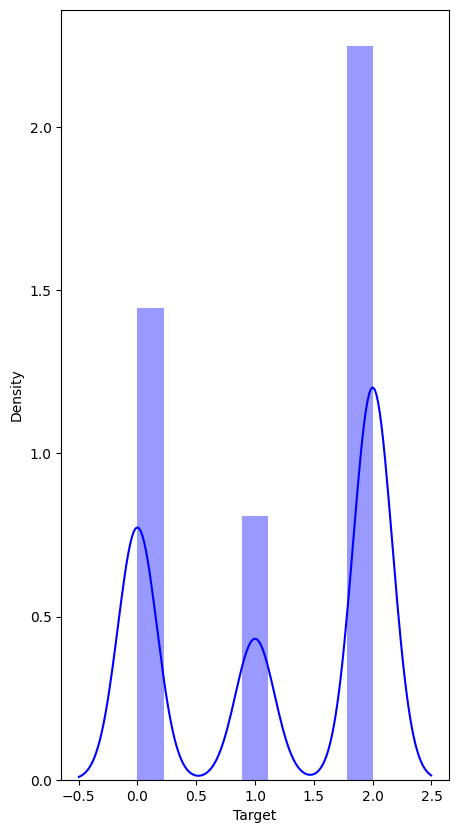

In [13]:
plt.figure(figsize=(5, 10))
sns.distplot(df['Target'], color = "Blue")

- The histogram bars show how many samples fall into each target category (0, 1, 2).

- The KDE curve (smooth line) overlays the histogram to show the probability density.

- From the plot:

    - 0 → represents one group (likely "Enrolled").

    - 1 → represents another group (likely "Dropout").

    - 2 → represents the last group (likely "Graduate").

- The tallest peak is at 2, meaning most students in your dataset are in the "Graduate" category.

- Smaller peaks at 0 and 1 show fewer students are still enrolled or dropped out compared to those who graduated.

👉 In short: The target column is categorical with three classes (0, 1, 2), and the dataset has more graduates than dropouts or currently enrolled students.

<Axes: xlabel='Target', ylabel='Count'>

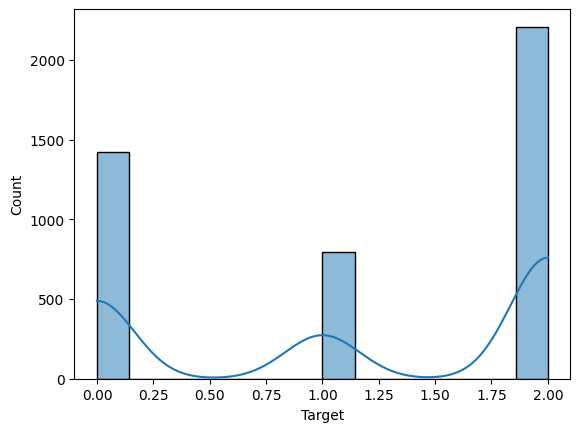

In [14]:
sns.histplot(df['Target'], kde=True)

Text(0.5, 1.0, 'Target')

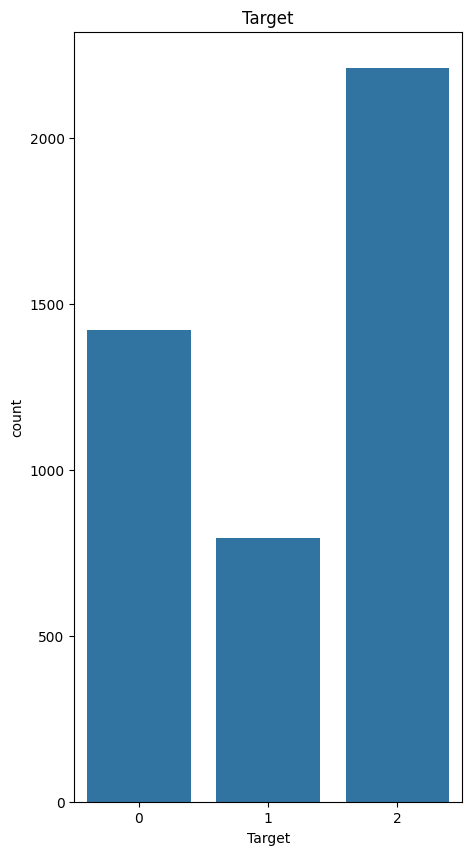

In [15]:
plt.figure(figsize=(5, 10))
sns.countplot(data = df, x="Target").set_title('Target')

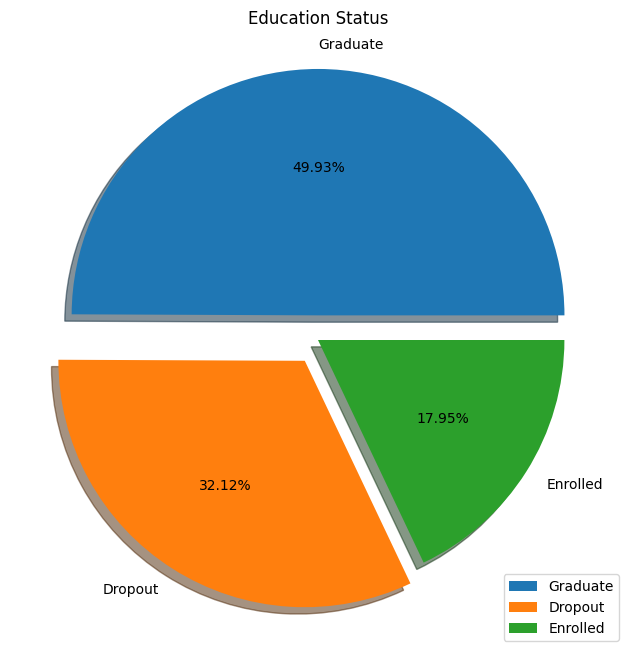

In [16]:
plt.figure(figsize=(8, 8))
plt.title("Education Status")
plt.pie(df['Target'].value_counts(), labels = ['Graduate', 'Dropout', 'Enrolled'], explode = (0.1, 0.1, 0.0), autopct='%1.2f%%', shadow = True)
plt.legend( loc = 'lower right')

#### Parameters meaning with interpretation

- 49.93 = 50% of the Target column has Graduates, 32% has Dropouts & 17.95% = 18% have Enrolled Students.

    - explode=(0.1, 0.1, 0.0) → Pulls the first two slices (Graduate & Dropout) slightly outward for emphasis.

    - autopct='%1.2f%%' → Shows percentages inside the slices with 2 decimal places.

    - shadow=True → Adds a shadow effect to make the chart look 3D.

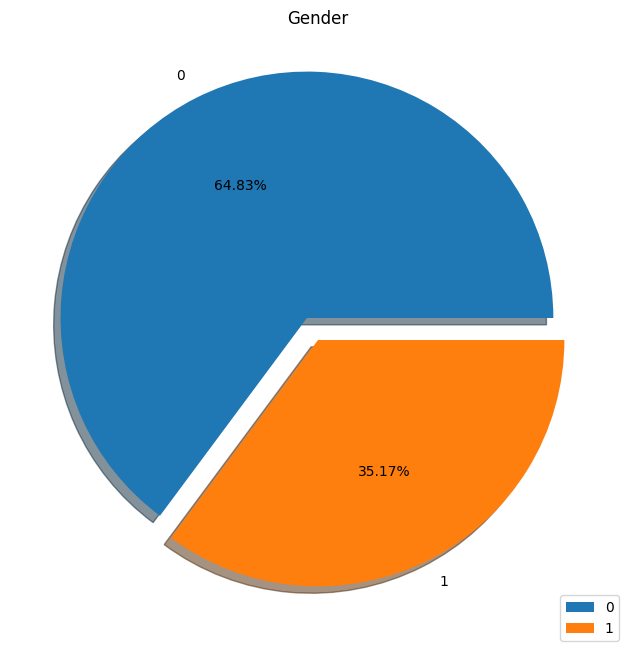

In [17]:
plt.figure(figsize=(8, 8))
plt.title("Gender")
plt.pie(df['Gender'].value_counts(), labels = ['0', '1'], explode = (0.1, 0.0), autopct='%1.2f%%', shadow = True)
plt.legend( loc = 'lower right')

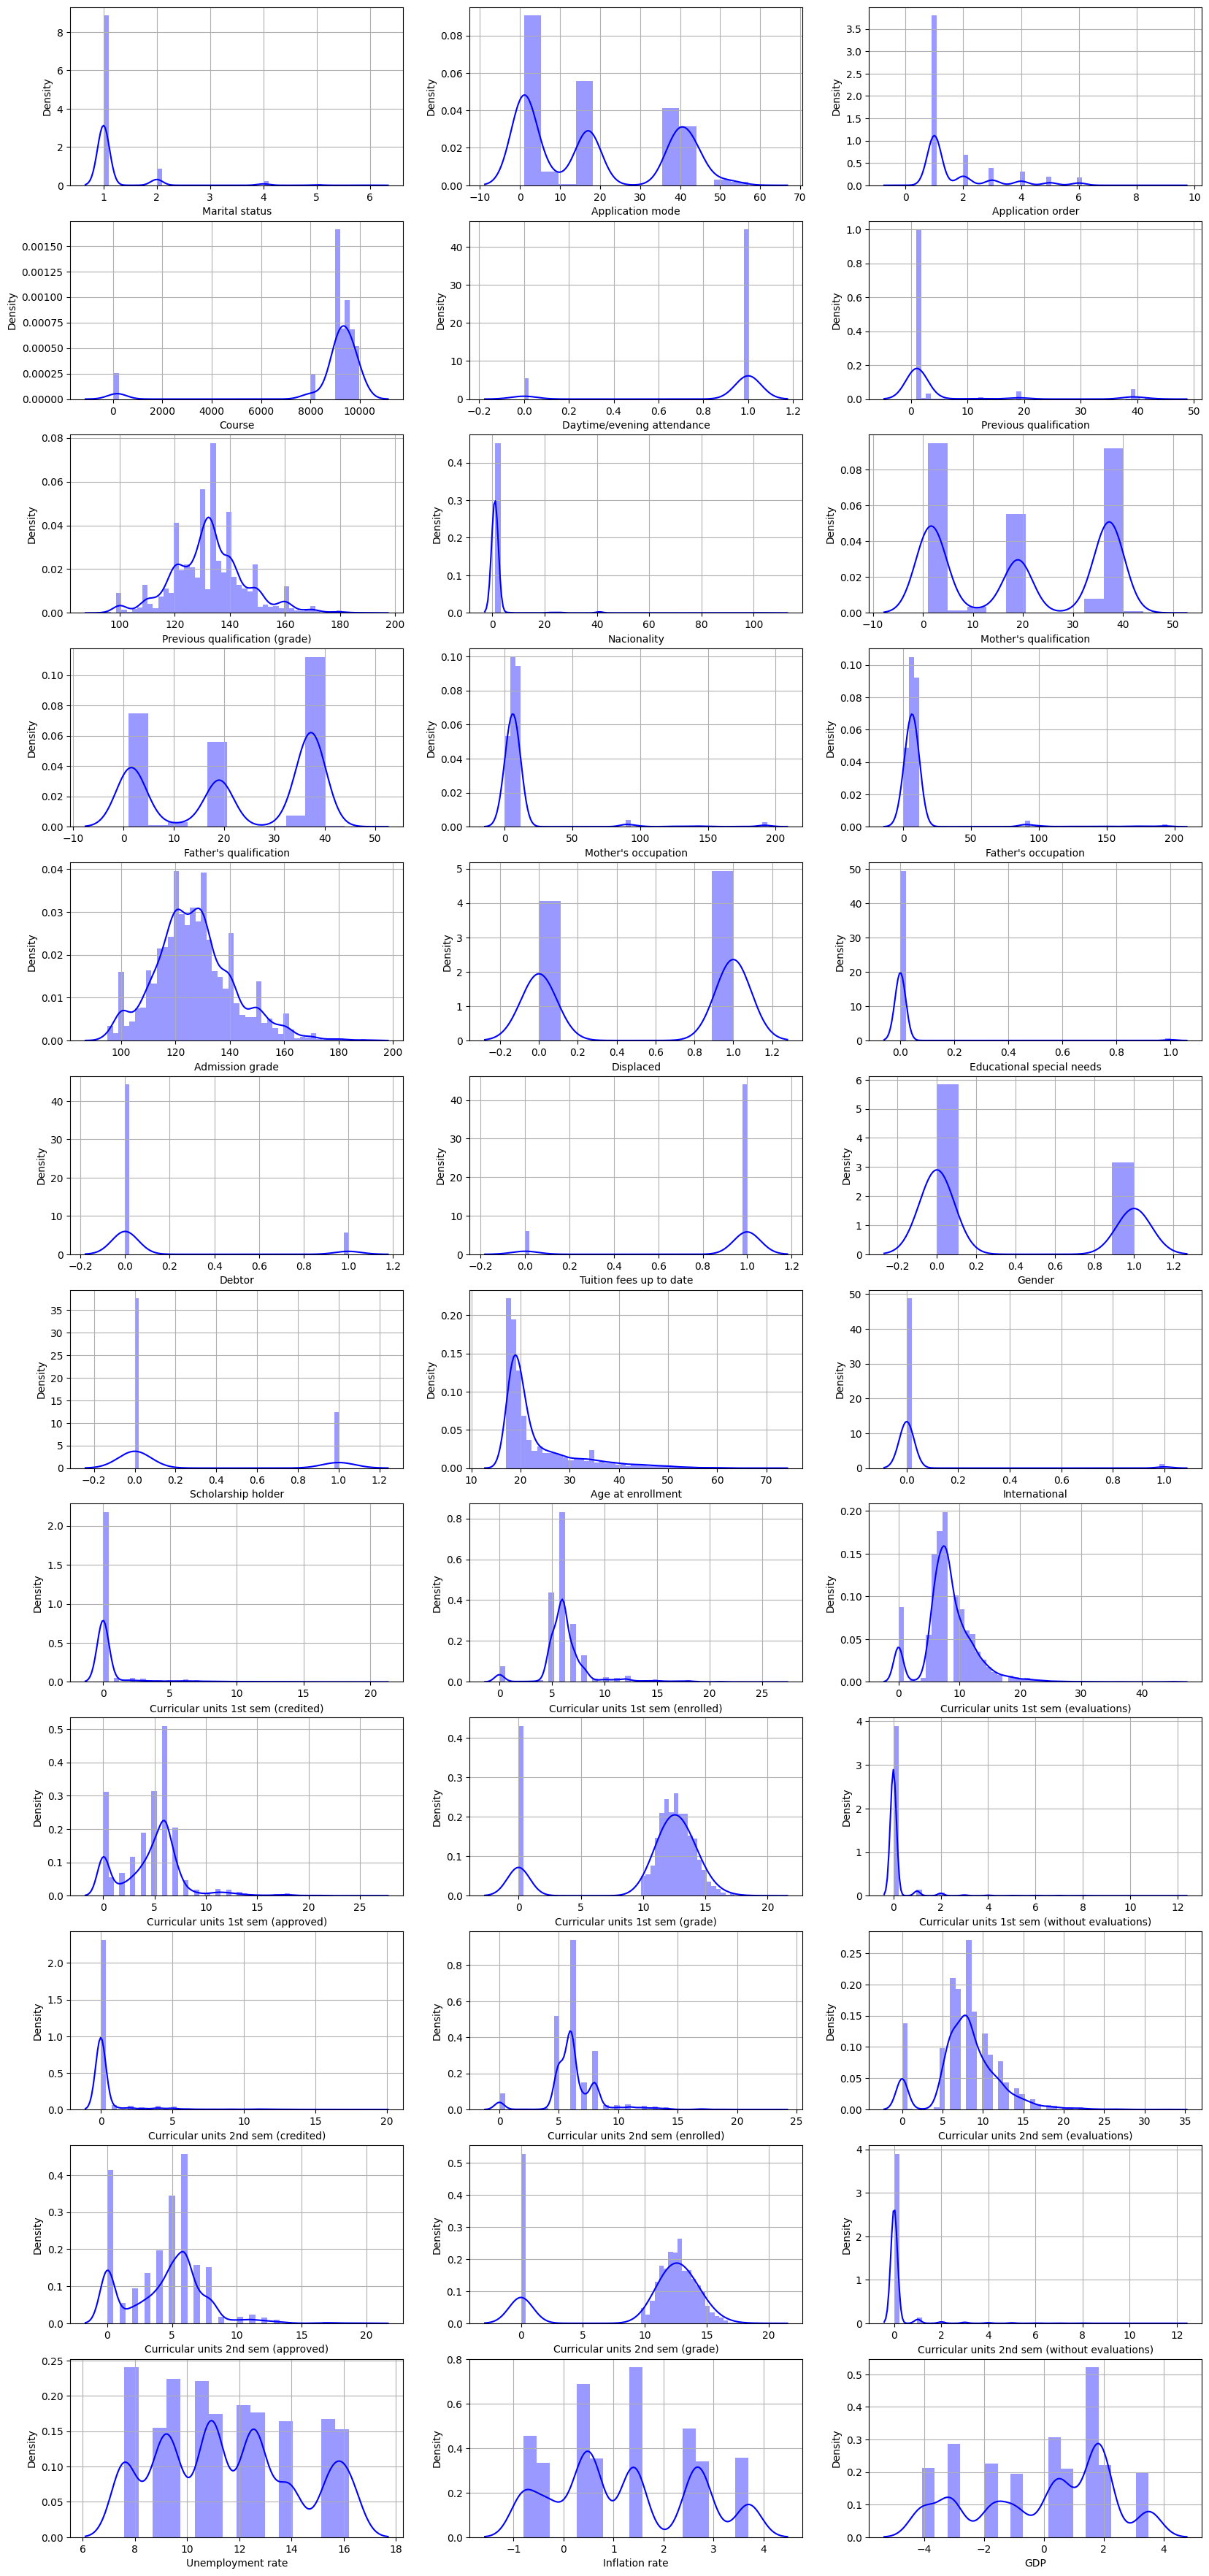

In [18]:
plt.figure(figsize=(20, 45))

for i in range(0, 36):
    plt.subplot(12,3,i+1)
    sns.distplot(df.iloc[:, i], color='blue')
    plt.grid()

## Parameters meaning & Interpretation of the graph

- This graph shows how the values of each column are distributed in a Histogram + KDE Plot.

- A KDE graph (Kernel Density Estimate plot) is a way to visualize the distribution of data, similar to a histogram but smoother.

**Simple Explanation**

    - Instead of showing bars like a histogram, KDE draws a continuous curve that estimates the probability density of the data.

    - It helps you see the shape of the distribution (peaks, spread, skewness) more clearly.

    - Each data point is “blurred” with a kernel (like a small bump), and all bumps are added together to form the smooth curve.

- for i in range(0, 36): Loops through the first 36 columns of your dataframe.

- plt.subplot(12, 3, i+1): Creates a grid of subplots with 12 rows and 3 columns (total 36 plots). Each iteration places the next plot in the next slot.

- sns.distplot(df.iloc[:, i], color='blue'): Plots the distribution (histogram + KDE curve) of the i-th column in your dataframe, in blue.

- plt.grid(): Adds grid lines to each subplot for readability.

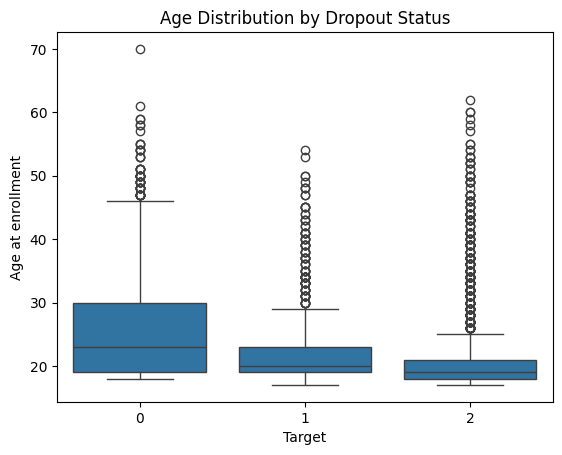

In [19]:
sns.boxplot(x="Target", y="Age at enrollment", data=df)
plt.title("Age Distribution by Dropout Status")
plt.show()

- This boxplot shows the distribution of Age at Enrollment across the three Target values (0, 1, 2), which represent different dropout statuses.

- The boxes for 0, 1, and 2 all capture the main age range of students, roughly 15 to 32 years.

- The points above the whiskers appear as statistical outliers, but based on domain knowledge, these ages are valid and not anomalies.

- The vertical line inside each box indicates the median age for that group.

**Interpretation by Target Value:**

- Target = 0 (No Dropout / Persistence):  
    Students above age 30 tend to remain enrolled longer, showing more stability in continuing their studies.

- Target = 1 (Dropout):  
    Students above age 32–33 are more likely to drop out. This could be linked to challenges such as balancing academics with financial or personal responsibilities.

- Target = 2 (Other Status, e.g., Transferred/Interrupted):  
The age distribution suggests that students in this group also cluster within the same 15–32 range, but those above 30 show a higher tendency to fall into this category. This may reflect transitions such as course changes, interruptions, or shifting priorities outside academics.

- Younger students (15–25) are more evenly distributed across all statuses.

- Older students (30+) show greater persistence in Target 0, but also higher dropout or transition rates in Target 1 and 2, likely due to external pressures like career, finances, or family responsibilities.

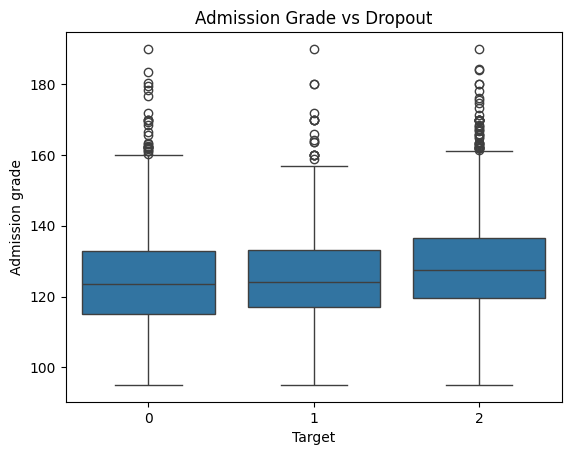

In [20]:
sns.boxplot(x="Target", y="Admission grade", data=df)
plt.title("Admission Grade vs Dropout")
plt.show()

- This boxplot shows the distribution of Admission Grade across the three Target values (0, 1, 2), representing different dropout statuses.

- The boxes for 0, 1, and 2 capture the main admission grade range, with most values clustering in the mid to high grade levels.

- The points above the whiskers appear as statistical outliers, but based on domain knowledge, these grades are valid and not anomalies.

- The vertical line inside each box indicates the median admission grade for that group.

**Interpretation by Target Value:**

- Target = 0 (No Dropout / Persistence):  
    Students with higher admission grades tend to persist more, showing that strong academic preparation is linked to continued enrollment.

- Target = 1 (Dropout):  
    Students with lower admission grades are more likely to drop out. This suggests that weaker academic foundations may contribute to difficulties in coping with coursework, leading to dropout.

- Target = 2 (Other Status, e.g., Transferred/Interrupted):  
    The distribution shows that students in this group often fall in the middle grade range. This may indicate that they are not failing outright but may face other challenges (course changes, interruptions, or external factors) that prevent them from continuing.

- Overall, the boxplot highlights that admission grade is a strong predictor of dropout behavior:

    - Higher grades → persistence (Target 0)

    - Lower grades → dropout (Target 1)

    - Middle grades → transitions or interruptions (Target 2)

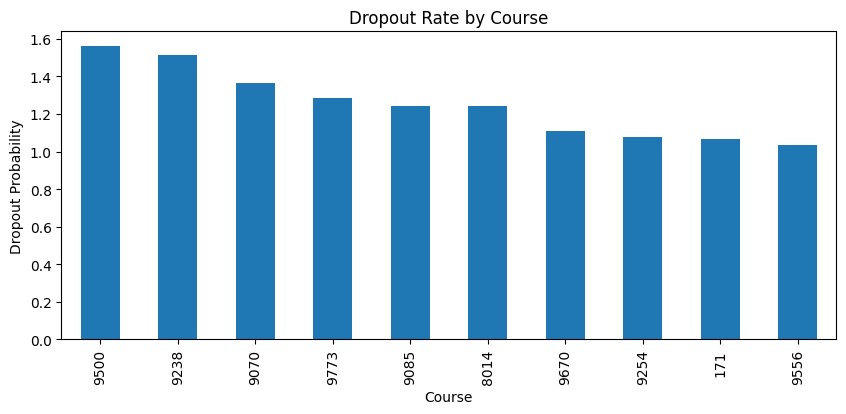

In [21]:
course_dropout = df.groupby("Course")["Target"].mean().sort_values(ascending=False)

course_dropout.head(10).plot(kind="bar", figsize=(10,4))
plt.title("Dropout Rate by Course")
plt.ylabel("Dropout Probability")
plt.show()

### Course Names & Interpretation of the Graph

- This is an histogram which shows Dropout rates by Course.
- 9500 - Nursing, has more dropouts and 9556 - Oral Hygiene, has least dropouts.

    - 33 - Biofuel Production Technologies
    - 171 - Animation and Multimedia Design
    - 8014 - Social Service (evening attendance)
    - 9003 - Agronomy
    - 9070 - Communication Design
    - 9085 - Veterinary Nursing
    - 9119 - Informatics Engineering
    - 9130 - Equinculture
    - 9147 - Management
    - 9238 - Social Service
    - 9254 - Tourism
    - 9500 - Nursing
    - 9556 - Oral Hygiene
    - 9670 - Advertising and Marketing Management
    - 9773 - Journalism and Communication
    - 9853 - Basic Education
    - 9991 - Management (evening attendance)

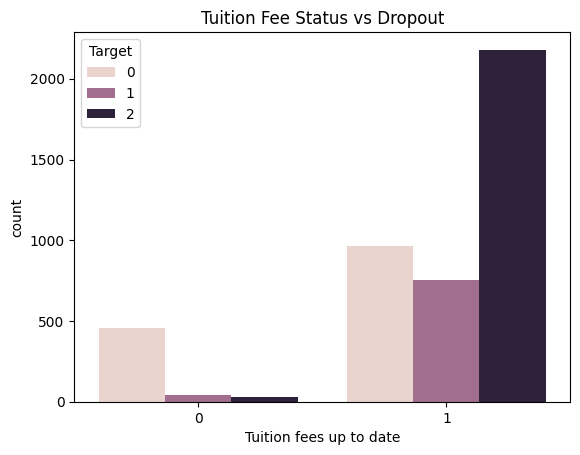

In [22]:
sns.countplot(x="Tuition fees up to date", hue="Target", data=df)
plt.title("Tuition Fee Status vs Dropout")
plt.show()

### Tuition Feees Names & Interpretation of the Graph

- Tuition fees has only 2 values, 0 = no, 1 = yes.
- Graduate = 2, Dropout = 0, Enrolled = 1
- Most of the Dropout students have not paid fees or its not up to date.
- The highest number Enrolled students have paid the fees or its up to date. And the rest of the numbers also are high as compared to all 3 categories in not paid. 

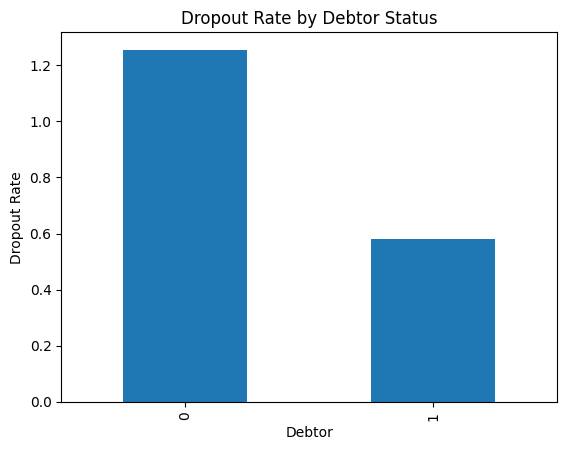

In [23]:
dropout_rate = df.groupby("Debtor")["Target"].mean()

dropout_rate.plot(kind="bar")
plt.ylabel("Dropout Rate")
plt.title("Dropout Rate by Debtor Status")
plt.show()

### Debtor column Values & Interpretation of the Graph

- 0 = no, 1 = yes.
- Most of the students are not debtors. And this makes it a good input for the predictions.
- The Debtor column is a good input for prediction because it tells the financial conditions of the student, whether the student is capable of paying debts or not. 

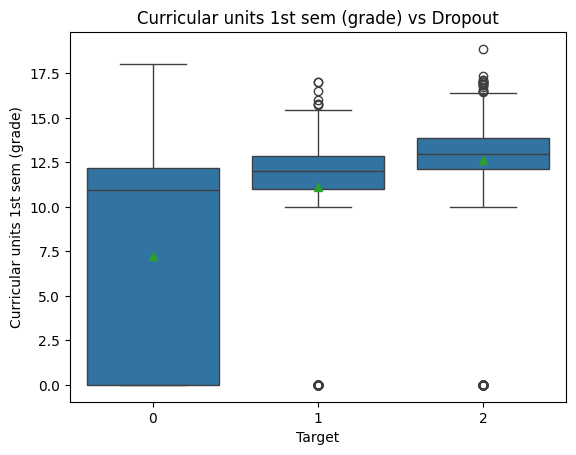

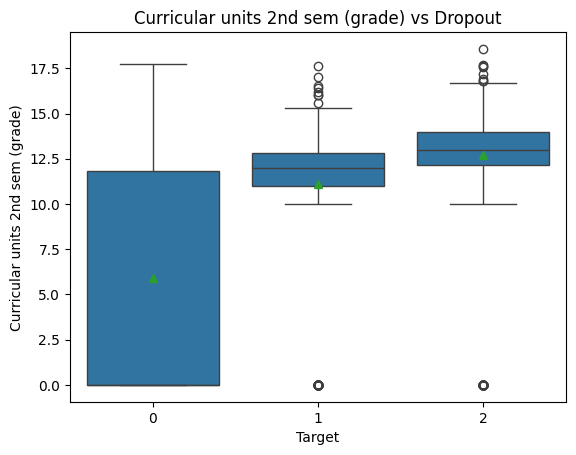

In [24]:
features = [
    "Curricular units 1st sem (grade)",
    "Curricular units 2nd sem (grade)"
]

for col in features:
    sns.boxplot(x="Target", y=col, data=df, showmeans = True)
    plt.title(f"{col} vs Dropout")
    plt.show()

- These boxplots show the distribution of Curricular Unit Grades for the 1st Semester and 2nd Semester across the three Target values (0, 1, 2), representing dropout statuses.

- The boxes capture the main grade ranges, while the vertical line inside each box indicates the median grade for that group.

- The points above the whiskers appear as statistical outliers, but based on domain knowledge, these values are valid and not anomalies.

- The plotted mean values (since you used showmeans=True) give an additional indicator of average performance for each group.

**Interpretation by Target Value:**

- Target = 0 (No Dropout / Persistence):  
    Students with higher grades in both semesters tend to persist more. Strong academic performance is clearly linked to continued enrollment.

- Target = 1 (Dropout):  
    Students with lower grades in both semesters are more likely to drop out. This suggests that academic struggles in coursework are a major factor behind dropout behavior.

- Target = 2 (Other Status, e.g., Transferred/Interrupted):  
    Students in this group generally fall in the middle grade range. They are not failing outright, but their performance is not strong enough to ensure persistence. This may reflect transitions such as course changes, interruptions, or external factors.

**Key Insight:**
- Across both semesters, grades are a strong predictor of dropout status:

    - High grades → persistence (Target 0)

    - Low grades → dropout (Target 1)

    - Middle grades → transitions/interruptions (Target 2)

Text(0.5, 1.0, 'Heatmap for correlations')

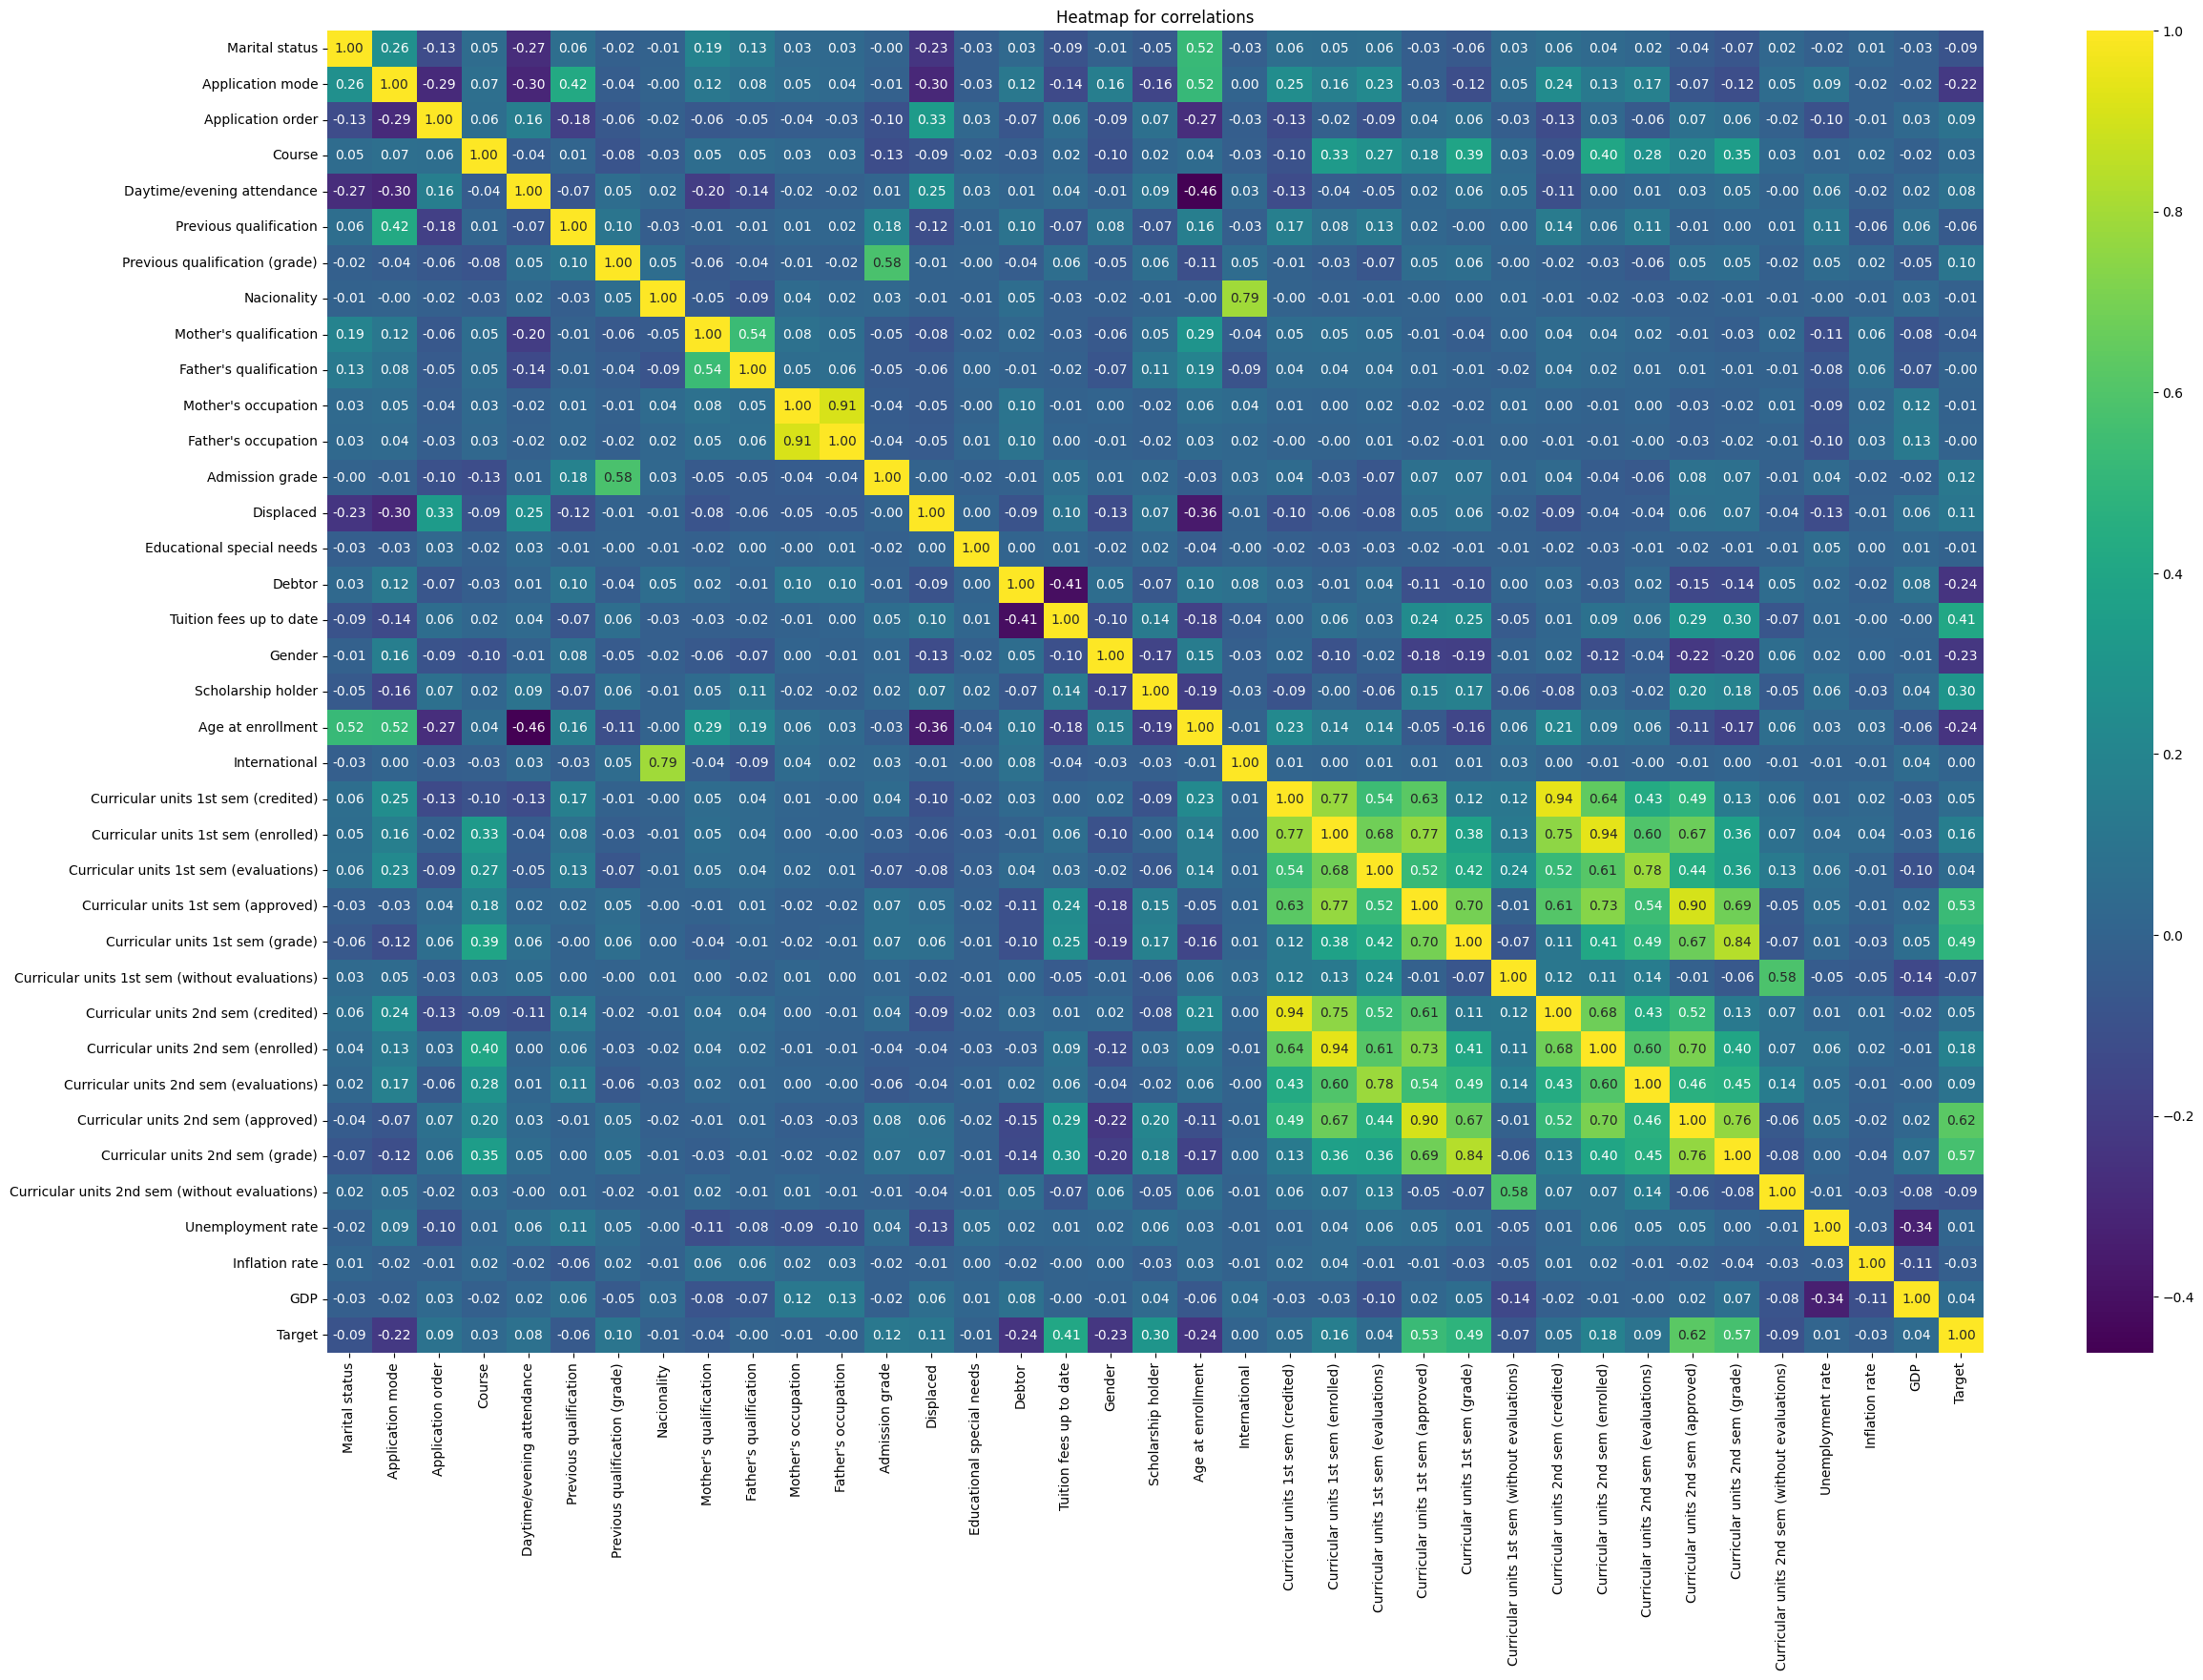

In [25]:
## Heatmap for correlations

plt.figure(figsize = (28, 18))
sns.heatmap(df.corr(), annot = True, cmap = 'viridis', fmt = '.2f')
plt.title('Heatmap for correlations')

### Interpretation of the Heatmap

- This heatmap shows the correlation between all numerical features in the dataset.

- The values range from -1 to +1, where:

    - +1 means strong positive correlation

    - -1 means strong negative correlation

    - 0 means no relationship

- The darker green/yellow shades indicate stronger relationships, while lighter shades indicate weak or no correlation.

- The diagonal line (all 1.00 values) represents each feature’s correlation with itself.

- Most of the demographic features (like Gender, Nationality, Marital Status) show weak correlation with the Target column.

- Academic performance features (especially Curricular Units performance metrics) show stronger correlation with the Target column.

- This suggests that academic behavior plays a bigger role in predicting dropout than demographic features.

#### Most Correlated Columns/Features

1. Curricular Units 1st Sem (Approved)

- Highly correlated with:

    - Curricular Units 1st Sem (Grade)

    - Curricular Units 1st Sem (Evaluations)

    - Curricular Units 1st Sem (Enrolled)

**Interpretation:**

- Students who:

    - Attend more

    - Get evaluated more

    - Score better
        -> Also get more approvals.
 
2. Curricular Units 2nd Sem (Approved)

- Strongly correlated with:

    - 2nd Sem Grade

    - 2nd Sem Evaluations

    - 2nd Sem Enrolled
 
3. Tuition Fees Up To Date ↔ Target (Moderate Negative Correlation)
    - Students who are financially regular are less likely to dropout.

4. Curricular Units (Approved) ↔ Target

#### Least Correlated Columns/Features

- These features show near-zero correlation with Target:

    - GDP

    - Inflation Rate

    - Unemployment Rate

    - Gender

    - Nationality

    - Educational Special Needs

**Interpretation:**

- Macroeconomic variables (like, in this dataset, Inflation, GDP, Debtor - related to Interest rate) seem to have little direct impact on dropout at an individual level (at least in this dataset).

**This means:**

- They might not add much predictive power.

- Or their effect is indirect.

#### **Columns with Multi-collinearity:**

- Multicollinearity means: Two or more independent variables are highly correlated with each other.

- Curricular Units 1st Sem:

    - Enrolled ↔ Evaluations

    - Evaluations ↔ Approved

    - Approved ↔ Grade

- These are very high (close to 0.8–0.95).

### Solving Multi-collinearity issue using VIF

- There are many columns which are not important and are also inter-related or co-related to each other in a way.
- "If Enrolled increases → Evaluations increase → Approved increases → Grade changes", this kind of cycle continues in the dataset.

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df.drop(columns = 'Target')
X_numeric = X.select_dtypes(include=['int64', 'float64'])

In [27]:
vif_data = pd.DataFrame()
vif_data['Feature'] = X_numeric.columns
vif_data['VIF'] = [variance_inflation_factor(X_numeric.values, i) for i in range(X_numeric.shape[1])]

vif_data.sort_values(by="VIF", ascending=False)

,Feature,VIF
22,Curricular units 1st sem (enrolled),180.786848
28,Curricular units 2nd sem (enrolled),155.748991
6,Previous qualification (grade),129.826257
12,Admission grade,116.617629
24,Curricular units 1st sem (approved),43.326296
3,Course,41.129647
30,Curricular units 2nd sem (approved),33.976309
25,Curricular units 1st sem (grade),30.264046
31,Curricular units 2nd sem (grade),28.033783
33,Unemployment rate,23.256265


In [28]:
df["Course"] = df["Course"].astype("category")
df2 = pd.get_dummies(df, columns=["Course"], drop_first=True)

In [29]:
df.shape

(4424, 37)

In [30]:
X2 = df2.drop(columns = 'Target')
X_numeric2 = X2.select_dtypes(include=['int64', 'float64', 'object', 'category'])

In [31]:
vif_data2 = pd.DataFrame()
vif_data2['Feature'] = X_numeric2.columns
vif_data2['VIF'] = [variance_inflation_factor(X_numeric2.values, i) for i in range(X_numeric2.shape[1])]

vif_data2.sort_values(by="VIF", ascending=False)

,Feature,VIF
21,Curricular units 1st sem (enrolled),173.976044
27,Curricular units 2nd sem (enrolled),150.455237
5,Previous qualification (grade),129.174098
11,Admission grade,116.561022
23,Curricular units 1st sem (approved),42.272826
29,Curricular units 2nd sem (approved),32.990461
24,Curricular units 1st sem (grade),29.112249
30,Curricular units 2nd sem (grade),26.703055
32,Unemployment rate,23.216952
18,Age at enrollment,21.531768


In [32]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [33]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd s

In [34]:
X3 = df2.drop(columns = ['Target',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (without evaluations)'])
X_numeric3 = X3.select_dtypes(include=['int64', 'float64', 'object', 'category'])

In [35]:
vif_data3 = pd.DataFrame()
vif_data3['Feature'] = X_numeric3.columns
vif_data3['VIF'] = [variance_inflation_factor(X_numeric3.values, i) for i in range(X_numeric3.shape[1])]

vif_data3.sort_values(by="VIF", ascending=False)

,Feature,VIF
5,Previous qualification (grade),125.819290
11,Admission grade,115.246987
22,Curricular units 2nd sem (approved),24.611534
23,Curricular units 2nd sem (grade),23.367324
21,Curricular units 1st sem (grade),23.355572
24,Unemployment rate,22.040483
20,Curricular units 1st sem (approved),22.037864
18,Age at enrollment,20.642661
3,Daytime/evening attendance,11.162611
15,Tuition fees up to date,10.809858


In [36]:
X4 = df2.drop(columns = ['Target',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (without evaluations)',
       'Previous qualification (grade)'])
X_numeric4 = X4.select_dtypes(include=['int64', 'float64', 'object', 'category'])

In [37]:
vif_data4 = pd.DataFrame()
vif_data4['Feature'] = X_numeric4.columns
vif_data4['VIF'] = [variance_inflation_factor(X_numeric4.values, i) for i in range(X_numeric4.shape[1])]

vif_data4.sort_values(by="VIF", ascending=False)

,Feature,VIF
10,Admission grade,40.763098
21,Unemployment rate,21.297947
17,Age at enrollment,20.519751
20,Curricular units 2nd sem (approved),18.853765
19,Curricular units 1st sem (approved),18.654009
3,Daytime/evening attendance,10.772538
14,Tuition fees up to date,10.502244
9,Father's occupation,7.074725
8,Mother's occupation,6.976235
0,Marital status,6.751574


In [38]:
df['Course'] = df['Course'].astype('int')

In [39]:
df.drop(columns = ['Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (without evaluations)',
       'Previous qualification (grade)', 'Inflation rate', 'GDP'], inplace=True)

### Grouping Courses into Academic Categories

- *Clean Academic Grouping*

1. STEM / Engineering

    - Biofuel Production Technologies

    - Informatics Engineering

    - Agronomy

2. Health Sciences

    - Nursing

    - Veterinary Nursing

    - Oral Hygiene

    - Equinculture

3. Business & Economics

    - Management

    - Management (evening attendance)

    - Advertising and Marketing Management

    - Tourism

4. Arts & Design

    - Animation and Multimedia Design

    - Communication Design

5. Social Sciences & Education

    - Social Service

    - Social Service (evening attendance)

    - Journalism and Communication

    - Basic Education

- This gives you:

    - 5 macro categories
    - Instead of 17 separate courses.

In [40]:
def group_course(course):
    if course in [33, 9119, 9003]:  # STEM codes
        return "STEM"
    elif course in [9500, 9085, 9556, 9130]:
        return "Health"
    elif course in [9147, 9991, 9670, 9254]:
        return "Business"
    elif course in [171, 9070]:
        return "Arts"
    else:
        return "Social_Sciences"

df["Course_Group"] = df["Course"].apply(group_course)

In [41]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (approved),Curricular units 2nd sem (approved),Unemployment rate,Target,Course_Group
0,1,17,5,171,1,1,1,19,12,5,...,1,1,0,20,0,0,0,10.8,0,Arts
1,1,15,1,9254,1,1,1,1,3,3,...,0,1,0,19,0,6,6,13.9,2,Business
2,1,1,5,9070,1,1,1,37,37,9,...,0,1,0,19,0,0,0,10.8,0,Arts
3,1,17,2,9773,1,1,1,38,37,5,...,1,0,0,20,0,6,5,9.4,2,Social_Sciences
4,2,39,1,8014,0,1,1,37,38,9,...,1,0,0,45,0,5,6,13.9,2,Social_Sciences


In [42]:
X5 = df2.drop(columns = ['Target',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (without evaluations)',
       'Previous qualification (grade)', 'Course_171', 'Course_8014',
       'Course_9003', 'Course_9070', 'Course_9085', 'Course_9119',
       'Course_9130', 'Course_9147', 'Course_9238', 'Course_9254',
       'Course_9500', 'Course_9556', 'Course_9670', 'Course_9773',
       'Course_9853', 'Course_9991', 'Inflation rate', 'GDP'])
X_numeric5 = X5.select_dtypes(include=['int64', 'float64', 'object', 'category'])

In [43]:
vif_data5 = pd.DataFrame()
vif_data5['Feature'] = X_numeric5.columns
vif_data5['VIF'] = [variance_inflation_factor(X_numeric5.values, i) for i in range(X_numeric5.shape[1])]

vif_data5.sort_values(by="VIF", ascending=False)

,Feature,VIF
10,Admission grade,39.972483
17,Age at enrollment,20.452628
21,Unemployment rate,19.104891
20,Curricular units 2nd sem (approved),18.817921
19,Curricular units 1st sem (approved),18.627174
3,Daytime/evening attendance,10.721080
14,Tuition fees up to date,10.464546
9,Father's occupation,7.060758
8,Mother's occupation,6.973973
0,Marital status,6.750820


- Now the VIF seems more in control than out of bound or control.
- Above 100 is not a good VIF Score for any column. It should be between 5-25.
- Around 40 for grade column is fine because logically: High admission grade → Better academic ability → More approvals → Lower dropout probability.

In [44]:
df.groupby("Course")["Target"].mean()

Course
33      0.416667
171     1.065116
8014    1.241860
9003    1.004762
9070    1.362832
9085    1.243323
9119    0.541176
9130    0.744681
9147    1.010526
9238    1.515493
9254    1.075397
9500    1.561358
9556    1.034884
9670    1.111940
9773    1.287009
9853    0.854167
9991    0.783582
Name: Target, dtype: float64

## Dropping a Target Category which is 1 = Enrolled

- As we are predicting whether a student will dropout or not so, the number of "Enrolled" student is irrelevant.
- We only need to know whether a student graduated or dropedout.
- So, we are dropping the "Enrolled" values and going forward with "Graduate" & "Dropout" values.

In [45]:
df.drop(df[df['Target'] == 1].index, inplace = True)
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (approved),Curricular units 2nd sem (approved),Unemployment rate,Target,Course_Group
0,1,17,5,171,1,1,1,19,12,5,...,1,1,0,20,0,0,0,10.8,0,Arts
1,1,15,1,9254,1,1,1,1,3,3,...,0,1,0,19,0,6,6,13.9,2,Business
2,1,1,5,9070,1,1,1,37,37,9,...,0,1,0,19,0,0,0,10.8,0,Arts
3,1,17,2,9773,1,1,1,38,37,5,...,1,0,0,20,0,6,5,9.4,2,Social_Sciences
4,2,39,1,8014,0,1,1,37,38,9,...,1,0,0,45,0,5,6,13.9,2,Social_Sciences
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,1,1,1,5,...,1,1,0,19,0,5,5,15.5,2,Social_Sciences
4420,1,1,2,9773,1,1,105,1,1,9,...,0,0,0,18,1,6,2,11.1,0,Social_Sciences
4421,1,1,1,9500,1,1,1,37,37,9,...,1,0,1,30,0,7,1,13.9,0,Health
4422,1,1,1,9147,1,1,1,37,37,7,...,1,0,1,20,0,5,5,9.4,2,Business


In [46]:
# This converts the multi-class target (0, 1, 2) into a binary indicator:
# 1 → Dropout (when Target = 0).
# 0 → Otherwise (Graduate or Enrolled).

df['Dropout'] = df['Target'].apply(lambda x: 1 if x==0 else 0)
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (approved),Curricular units 2nd sem (approved),Unemployment rate,Target,Course_Group,Dropout
0,1,17,5,171,1,1,1,19,12,5,...,1,0,20,0,0,0,10.8,0,Arts,1
1,1,15,1,9254,1,1,1,1,3,3,...,1,0,19,0,6,6,13.9,2,Business,0
2,1,1,5,9070,1,1,1,37,37,9,...,1,0,19,0,0,0,10.8,0,Arts,1
3,1,17,2,9773,1,1,1,38,37,5,...,0,0,20,0,6,5,9.4,2,Social_Sciences,0
4,2,39,1,8014,0,1,1,37,38,9,...,0,0,45,0,5,6,13.9,2,Social_Sciences,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,1,1,1,5,...,1,0,19,0,5,5,15.5,2,Social_Sciences,0
4420,1,1,2,9773,1,1,105,1,1,9,...,0,0,18,1,6,2,11.1,0,Social_Sciences,1
4421,1,1,1,9500,1,1,1,37,37,9,...,0,1,30,0,7,1,13.9,0,Health,1
4422,1,1,1,9147,1,1,1,37,37,7,...,0,1,20,0,5,5,9.4,2,Business,0


<Axes: xlabel='Dropout', ylabel='Density'>

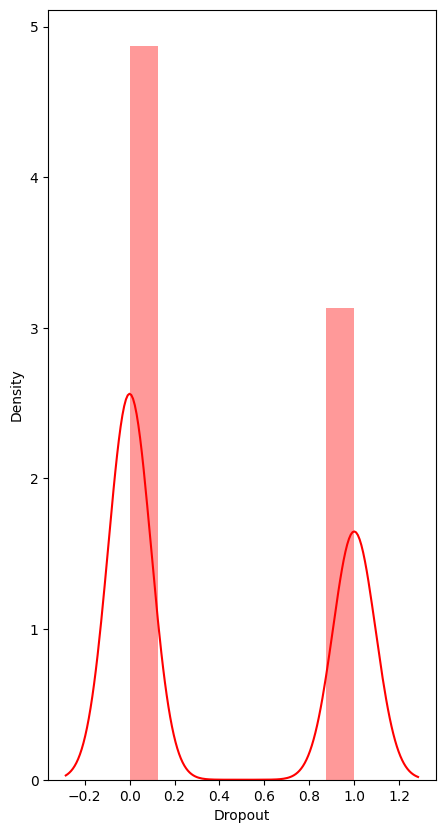

In [47]:
plt.figure(figsize=(5, 10))
sns.distplot(df['Dropout'], color = "red")

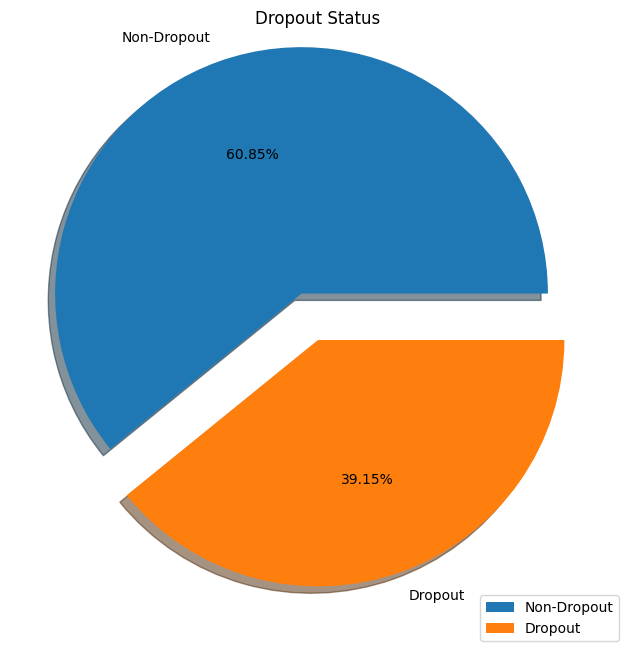

In [48]:
plt.figure(figsize=(8, 8))
plt.title("Dropout Status")
plt.pie(df['Dropout'].value_counts(),  labels = ['Non-Dropout', 'Dropout'], explode = (0.2, 0.0), autopct='%1.2f%%', shadow = True)
plt.legend( loc = 'lower right')

In [49]:
df = pd.get_dummies(df, columns=["Course_Group"], drop_first=True)

In [50]:
X = df.drop(columns=["Target", "Dropout"])
y = df["Dropout"]

### Train & Test Splitting the Data

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Standard Scaling the Data

- But only for the algorithms which need scaling, not for all the algorithms.

In [52]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,International,Curricular units 1st sem (approved),Curricular units 2nd sem (approved),Unemployment rate,Target,Dropout,Course_Group_Business,Course_Group_Health,Course_Group_STEM,Course_Group_Social_Sciences
0,1,17,5,171,1,1,1,19,12,5,...,0,0,0,10.8,0,1,False,False,False,False
1,1,15,1,9254,1,1,1,1,3,3,...,0,6,6,13.9,2,0,True,False,False,False
2,1,1,5,9070,1,1,1,37,37,9,...,0,0,0,10.8,0,1,False,False,False,False
3,1,17,2,9773,1,1,1,38,37,5,...,0,6,5,9.4,2,0,False,False,False,True
4,2,39,1,8014,0,1,1,37,38,9,...,0,5,6,13.9,2,0,False,False,False,True


In [54]:
df.dtypes

Marital status                           int64
Application mode                         int64
Application order                        int64
Course                                   int64
Daytime/evening attendance               int64
Previous qualification                   int64
Nacionality                              int64
Mother's qualification                   int64
Father's qualification                   int64
Mother's occupation                      int64
Father's occupation                      int64
Admission grade                        float64
Displaced                                int64
Educational special needs                int64
Debtor                                   int64
Tuition fees up to date                  int64
Gender                                   int64
Scholarship holder                       int64
Age at enrollment                        int64
International                            int64
Curricular units 1st sem (approved)      int64
Curricular un

# Model Building

### Why These Models Were Chosen

**Logistic Regression**  
- Acts as a strong baseline for classification tasks.  
- Easy to interpret since coefficients directly show feature influence on the outcome.  
- Uses a linear equation with a sigmoid function, making it mathematically elegant and simple.  
- Efficient to train, even on large datasets, and less prone to overfitting compared to complex models.  

**Decision Tree Classifier**  
- Captures non-linear relationships and feature interactions naturally.  
- Provides clear interpretability through tree visualization, making decisions easy to explain.  
- Handles both numerical and categorical data without heavy preprocessing.  
- Useful for feature importance ranking and quick prototyping.  

**XGBoost (Extreme Gradient Boosting)**  
- Highly efficient and powerful ensemble method, often winning Kaggle competitions.  
- Incorporates regularization to reduce overfitting, improving generalization.  
- Optimized for speed and performance, especially with large datasets.  
- Provides feature importance insights while maintaining high predictive accuracy.   

**Support Vector Classifier (SVC)**  
- Effective in high-dimensional spaces, especially when features outnumber samples.  
- Uses kernel trick to capture complex, non-linear decision boundaries.  
- Robust to overfitting when properly tuned with regularization.  
- Provides a strong theoretical foundation in margin maximization, ensuring good generalization.  

**MLP Classifier (Neural Network)**  
- Capable of modeling highly complex, non-linear relationships.  
- Learns hierarchical feature representations automatically.  
- Flexible architecture allows adaptation to different dataset sizes and complexities.  
- Useful when simpler models fail to capture intricate patterns in the data.  

**StandardScaler (Preprocessing)**  
- Ensures features are on the same scale, preventing bias in models sensitive to magnitude (e.g., SVM, Logistic Regression, Neural Networks).  
- Improves convergence speed for gradient-based algorithms.  
- Helps stabilize training by reducing numerical instability.  
- Essential step for fair comparison across models.  

**Classification Report & Confusion Matrix (Evaluation)**  
- Provide detailed insights into precision, recall, F1-score, and accuracy.  
- Confusion matrix highlights misclassification patterns, guiding model improvement.  
- Allow comparison across models beyond just accuracy.  
- Ensure balanced evaluation, especially in imbalanced datasets.

**GaussianNB (Naive Bayes Classifier)**
- Based on Bayes’ theorem, assumes features follow a normal (Gaussian) distribution.
- Extremely fast and efficient, making it ideal for large datasets and real-time predictions.
- Performs well on high-dimensional data and text classification tasks.
- Simple yet surprisingly effective baseline model, often used for quick prototyping and comparison.

In [55]:
from sklearn.pipeline import Pipeline

MODEL_CONFIGS = {

    # 🔹 Needs scaling
    "Logistic Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", LogisticRegression(
            C=1.0,
            solver="liblinear",
            class_weight="balanced",
            max_iter=1000
        ))
    ]),

    # 🔹 No scaling needed
    "Decision Tree": DecisionTreeClassifier(
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        class_weight="balanced",
        random_state=42,
        criterion="gini"
    ),

    # 🔹 No scaling needed
    "Random Forest": RandomForestClassifier(
        n_estimators=300,
        max_depth=10,
        min_samples_split=2,
        min_samples_leaf=2,
        max_features="sqrt",
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    ),

    # 🔹 No scaling needed
    "XGBoost": XGBClassifier(
        n_estimators=200,
        max_depth=5,
        learning_rate=0.05,
        subsample=1.0,
        colsample_bytree=0.8,
        objective="binary:logistic",
        eval_metric="logloss",
        scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
        random_state=42
    ),

    # 🔹 Needs scaling
    "SVC": Pipeline([
        ("scaler", StandardScaler()),
        ("model", SVC(
            C=0.1,
            gamma="auto",
            kernel="rbf",
            class_weight="balanced",
            probability=True
        ))
    ]),

    # 🔹 Needs scaling
    "MLP": Pipeline([
        ("scaler", StandardScaler()),
        ("model", MLPClassifier(
            hidden_layer_sizes=(64, 32),
            alpha=0.001,
            learning_rate_init=0.01,
            max_iter=500,
            random_state=42
        ))
    ]),

    # 🔹 Needs scaling
    "Gaussian NB": Pipeline([
        ("scaler", StandardScaler()),
        ("model", GaussianNB())
    ])
}


Training: Logistic Regression
Accuracy : 0.9008
Precision: 0.8605
Recall   : 0.8908
F1 Score : 0.8754
ROC-AUC  : 0.9497

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       442
           1       0.86      0.89      0.88       284

    accuracy                           0.90       726
   macro avg       0.89      0.90      0.90       726
weighted avg       0.90      0.90      0.90       726



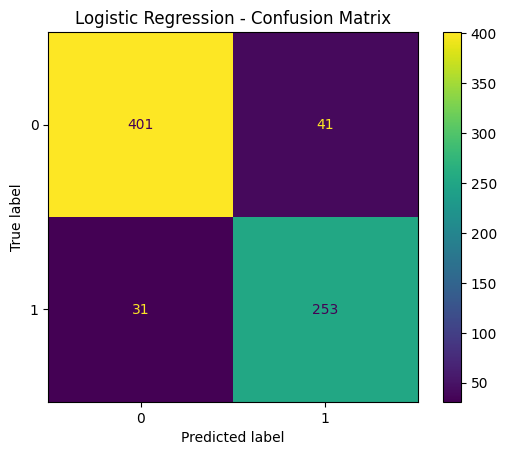


Training: Decision Tree
Accuracy : 0.8581
Precision: 0.7948
Recall   : 0.8592
F1 Score : 0.8257
ROC-AUC  : 0.8926

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       442
           1       0.79      0.86      0.83       284

    accuracy                           0.86       726
   macro avg       0.85      0.86      0.85       726
weighted avg       0.86      0.86      0.86       726



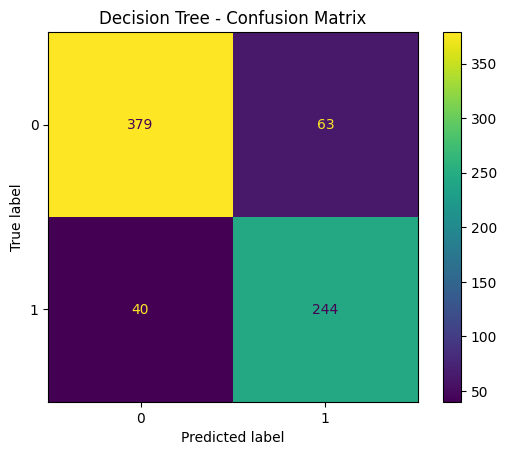


Training: Random Forest
Accuracy : 0.9077
Precision: 0.8861
Recall   : 0.8768
F1 Score : 0.8814
ROC-AUC  : 0.9670

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       442
           1       0.89      0.88      0.88       284

    accuracy                           0.91       726
   macro avg       0.90      0.90      0.90       726
weighted avg       0.91      0.91      0.91       726



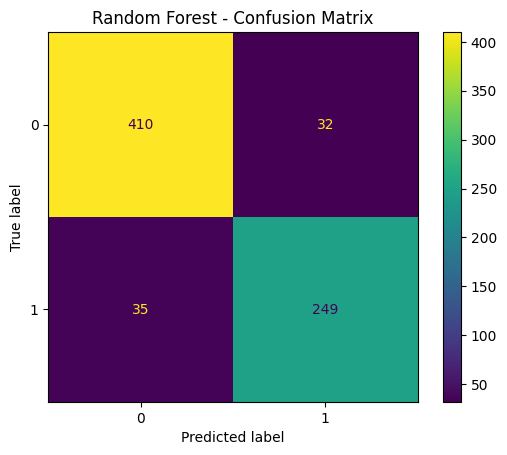


Training: XGBoost
Accuracy : 0.9201
Precision: 0.8979
Recall   : 0.8979
F1 Score : 0.8979
ROC-AUC  : 0.9660

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       442
           1       0.90      0.90      0.90       284

    accuracy                           0.92       726
   macro avg       0.92      0.92      0.92       726
weighted avg       0.92      0.92      0.92       726



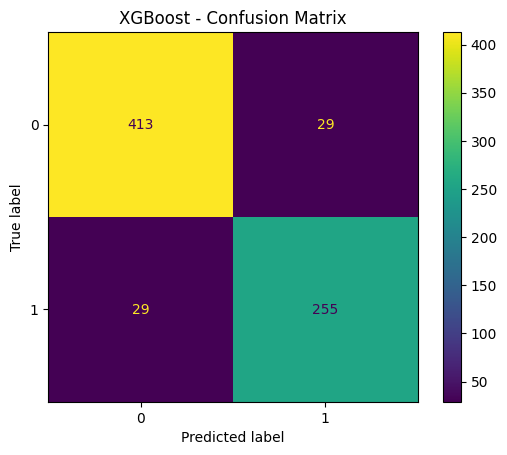


Training: SVC
Accuracy : 0.8802
Precision: 0.8208
Recall   : 0.8873
F1 Score : 0.8528
ROC-AUC  : 0.9458

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       442
           1       0.82      0.89      0.85       284

    accuracy                           0.88       726
   macro avg       0.87      0.88      0.88       726
weighted avg       0.88      0.88      0.88       726



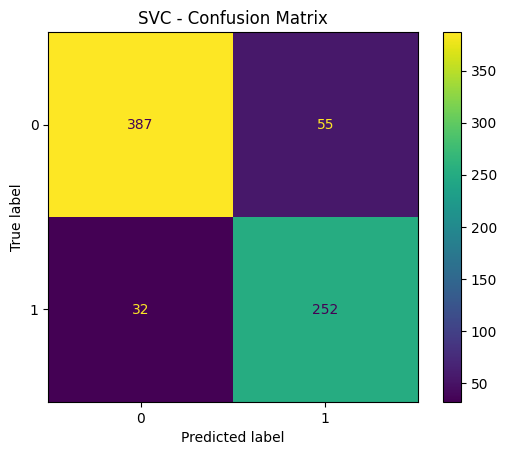


Training: MLP
Accuracy : 0.8857
Precision: 0.8407
Recall   : 0.8732
F1 Score : 0.8566
ROC-AUC  : 0.9365

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       442
           1       0.84      0.87      0.86       284

    accuracy                           0.89       726
   macro avg       0.88      0.88      0.88       726
weighted avg       0.89      0.89      0.89       726



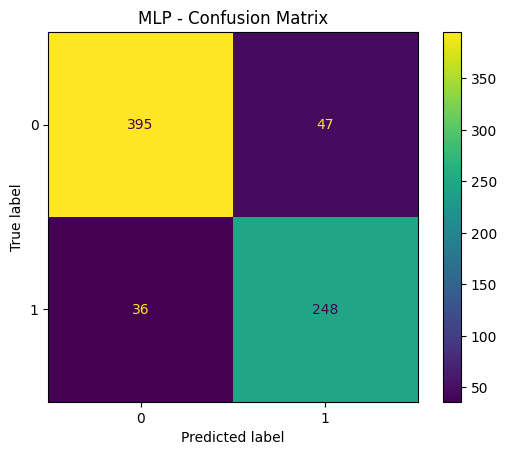


Training: Gaussian NB
Accuracy : 0.8182
Precision: 0.7585
Recall   : 0.7852
F1 Score : 0.7716
ROC-AUC  : 0.9036

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       442
           1       0.76      0.79      0.77       284

    accuracy                           0.82       726
   macro avg       0.81      0.81      0.81       726
weighted avg       0.82      0.82      0.82       726



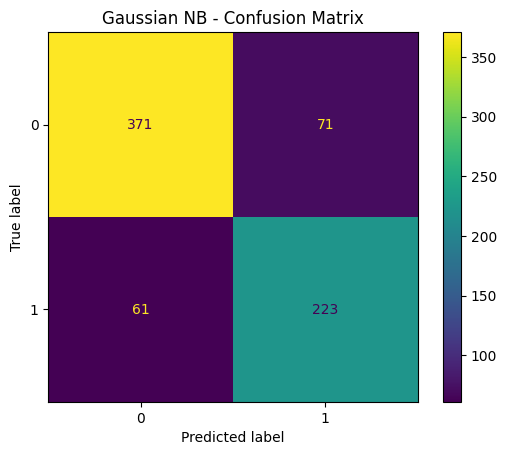

In [56]:
results = {}

for name, model in MODEL_CONFIGS.items():

    print(f"\n{'='*50}")
    print(f"Training: {name}")
    print(f"{'='*50}")

    # Train
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Probabilities (if available)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_proba)
    else:
        roc_auc = None

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 Score : {f1:.4f}")

    if roc_auc:
        print(f"ROC-AUC  : {roc_auc:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

    # Store results
    results[name] = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1": f1,
        "ROC-AUC": roc_auc
    }

In [57]:
results_df_f1 = pd.DataFrame(results).T.sort_values(by="F1", ascending=False)
results_df_f1

,Accuracy,Precision,Recall,F1,ROC-AUC
XGBoost,0.920110,0.897887,0.897887,0.897887,0.966047
Random Forest,0.907713,0.886121,0.876761,0.881416,0.966964
Logistic Regression,0.900826,0.860544,0.890845,0.875433,0.949685
MLP,0.885675,0.840678,0.873239,0.856649,0.936468
SVC,0.880165,0.820847,0.887324,0.852792,0.945773
Decision Tree,0.858127,0.794788,0.859155,0.825719,0.892574
Gaussian NB,0.818182,0.758503,0.785211,0.771626,0.903603


In [58]:
results_df_roc = pd.DataFrame(results).T.sort_values(by="ROC-AUC", ascending=False)
results_df_roc

,Accuracy,Precision,Recall,F1,ROC-AUC
Random Forest,0.907713,0.886121,0.876761,0.881416,0.966964
XGBoost,0.920110,0.897887,0.897887,0.897887,0.966047
Logistic Regression,0.900826,0.860544,0.890845,0.875433,0.949685
SVC,0.880165,0.820847,0.887324,0.852792,0.945773
MLP,0.885675,0.840678,0.873239,0.856649,0.936468
Gaussian NB,0.818182,0.758503,0.785211,0.771626,0.903603
Decision Tree,0.858127,0.794788,0.859155,0.825719,0.892574


In [59]:
results_df_acc = pd.DataFrame(results).T.sort_values(by="Accuracy", ascending=False)
results_df_acc

,Accuracy,Precision,Recall,F1,ROC-AUC
XGBoost,0.920110,0.897887,0.897887,0.897887,0.966047
Random Forest,0.907713,0.886121,0.876761,0.881416,0.966964
Logistic Regression,0.900826,0.860544,0.890845,0.875433,0.949685
MLP,0.885675,0.840678,0.873239,0.856649,0.936468
SVC,0.880165,0.820847,0.887324,0.852792,0.945773
Decision Tree,0.858127,0.794788,0.859155,0.825719,0.892574
Gaussian NB,0.818182,0.758503,0.785211,0.771626,0.903603


In [60]:
results_df_precision = pd.DataFrame(results).T.sort_values(by="Precision", ascending=False)
results_df_precision

,Accuracy,Precision,Recall,F1,ROC-AUC
XGBoost,0.920110,0.897887,0.897887,0.897887,0.966047
Random Forest,0.907713,0.886121,0.876761,0.881416,0.966964
Logistic Regression,0.900826,0.860544,0.890845,0.875433,0.949685
MLP,0.885675,0.840678,0.873239,0.856649,0.936468
SVC,0.880165,0.820847,0.887324,0.852792,0.945773
Decision Tree,0.858127,0.794788,0.859155,0.825719,0.892574
Gaussian NB,0.818182,0.758503,0.785211,0.771626,0.903603


- "Due to compatibility issues between the latest sklearn API and CatBoost estimator interface, CatBoost hyperparameter tuning was implemented using manual cross-validation instead of GridSearchCV."

## Hyper-Parameter Tuning

- Using StratifiedKFold, GridSearchCV & RandomizedSearchCV.
- Using F1 Score as the main scoring metric because dropout detection matters more than raw accuracy.

In [61]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [62]:
SCORING = "f1"

In [63]:
# Logistic Regression

log_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(
        solver="liblinear",
        class_weight="balanced",
        max_iter=1000
    ))
])

log_param = {
    "model__C": [0.01, 0.1, 1, 10],
    "model__penalty": ["l1", "l2"]
}

log_grid = GridSearchCV(
    log_pipe,
    log_param,
    cv=cv,
    scoring=SCORING,
    n_jobs=-1
)

In [64]:
# Decision Tree

dt_pipe = Pipeline([
    ("model", DecisionTreeClassifier(
        class_weight="balanced",
        random_state=42
    ))
])

dt_param = {
    "model__max_depth": [5, 8, 10, 15],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 5]
}

dt_grid = GridSearchCV(
    dt_pipe,
    dt_param,
    cv=cv,
    scoring=SCORING,
    n_jobs=-1
)

In [65]:
# Random Forest

rf_pipe = Pipeline([
    ("model", RandomForestClassifier(
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    ))
])

rf_param = {
    "model__n_estimators": [200, 300, 500],
    "model__max_depth": [None, 8, 12],
    "model__min_samples_leaf": [1, 2, 5]
}

rf_grid = GridSearchCV(
    rf_pipe,
    rf_param,
    cv=cv,
    scoring=SCORING,
    n_jobs=-1
)

In [66]:
# XGBoost

xgb_pipe = Pipeline([
    ("model", XGBClassifier(
        objective="binary:logistic",
        eval_metric="logloss",
        random_state=42
    ))
])

xgb_param = {
    "model__learning_rate": [0.01, 0.05, 0.1],
    "model__max_depth": [3, 5, 7],
    "model__n_estimators": [200, 400, 600],
    "model__subsample": [0.8, 1.0],
    "model__colsample_bytree": [0.8, 1.0]
}

xgb_random = RandomizedSearchCV(
    xgb_pipe,
    xgb_param,
    cv=cv,
    scoring=SCORING,
    n_iter=20,
    n_jobs=-1,
    random_state=42
)

In [67]:
# SVC

svc_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", SVC(
        class_weight="balanced",
        probability=True
    ))
])

svc_param = {
    "model__C": [0.01, 0.1, 1, 10],
    "model__gamma": ["scale", "auto"]
}

svc_grid = GridSearchCV(
    svc_pipe,
    svc_param,
    cv=cv,
    scoring=SCORING,
    n_jobs=-1
)

In [68]:
# MLP Classifier

mlp_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", MLPClassifier(
        max_iter=500,
        random_state=42
    ))
])

mlp_param = {
    "model__hidden_layer_sizes": [(64,), (64, 32), (128, 64)],
    "model__alpha": [0.0001, 0.001],
    "model__learning_rate_init": [0.001, 0.01]
}

mlp_grid = GridSearchCV(
    mlp_pipe,
    mlp_param,
    cv=cv,
    scoring=SCORING,
    n_jobs=-1
)

In [69]:
# Gaussian NB

gnb_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", GaussianNB())
])

gnb_param = {
    "model__var_smoothing": [1e-9, 1e-8, 1e-7]
}

gnb_grid = GridSearchCV(
    gnb_pipe,
    gnb_param,
    cv=cv,
    scoring=SCORING,
    n_jobs=-1
)

# Reasonings for each model

---

## Logistic Regression

"I tuned C to control regularization strength because earlier we handled multicollinearity. Smaller C means stronger regularization which reduces overfitting. L1 vs L2 penalty helps test whether feature selection improves performance."

---

## Decision Tree

"I tuned max_depth and min_samples parameters because trees easily overfit. Controlling depth and minimum samples ensures better generalization instead of memorizing training data."

---

## Random Forest

"I tuned number of trees and tree depth to balance bias and variance. More trees increase stability, but deeper trees increase overfitting. So tuning helps find optimal complexity."

---

## XGBoost

"I tuned learning_rate and number of estimators because boosting models depend heavily on this tradeoff. Smaller learning rate with more trees usually improves generalization. Subsample and colsample control randomness and reduce overfitting."

---

## SVC

"I tuned C and gamma because SVM performance strongly depends on margin flexibility. C controls penalty for misclassification and gamma controls influence of data points."

---

## MLP

"I tuned hidden layer size and regularization alpha to control network complexity. Larger networks capture nonlinear patterns but may overfit, so alpha helps stabilize learning."

---

## Gaussian NB

"I tuned var_smoothing slightly to improve numerical stability since Naive Bayes assumes feature independence and Gaussian distribution."

---

# Final Move:

- We are not training any model deeply because we have already got good results in most of the models.
- We will tune the main parameters of each model. This will avoid corruption of previously tuned models.

In [70]:
def evaluate_model(grid, X_train, y_train, X_test, y_test, model_name):

    print("="*60)
    print(f"🔍 MODEL: {model_name}")
    print("="*60)

    # Fit
    grid.fit(X_train, y_train)

    # Best info
    print("\n📌 Best Hyperparameters:")
    print(grid.best_params_)

    print("\n📊 Best CV F1 Score:")
    print(f"{grid.best_score_:.4f}")

    # Detailed CV results
    results_df = pd.DataFrame(grid.cv_results_)

    print("\n📈 CV Score Stability:")
    print(f"Mean CV Score : {results_df.loc[grid.best_index_, 'mean_test_score']:.4f}")
    print(f"Std CV Score  : {results_df.loc[grid.best_index_, 'std_test_score']:.4f}")

    # Overfitting check (if train score available)
    if "mean_train_score" in results_df.columns:
        train_score = results_df.loc[grid.best_index_, 'mean_train_score']
        test_score = results_df.loc[grid.best_index_, 'mean_test_score']

        print("\n🧠 Overfitting Check:")
        print(f"Train Score : {train_score:.4f}")
        print(f"CV Score    : {test_score:.4f}")
        print(f"Gap         : {train_score - test_score:.4f}")

    # Top 5 combinations
    print("\n🏆 Top 5 Hyperparameter Combinations:")
    display_cols = ["mean_test_score", "std_test_score", "params"]
    top5 = results_df.sort_values("mean_test_score", ascending=False)[display_cols].head(5)
    print(top5.to_string(index=False))

    # Test evaluation
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    print("\n🧪 Test Set Evaluation:")
    print(classification_report(y_test, y_pred))

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # ROC AUC (if probabilities available)
    if hasattr(best_model, "predict_proba"):
        y_prob = best_model.predict_proba(X_test)[:, 1]
        roc = roc_auc_score(y_test, y_prob)
        print(f"ROC-AUC Score: {roc:.4f}")
    else:
        roc = None

    print("\n✅ Evaluation Complete")
    print("="*60)

    return {
        "model": model_name,
        "best_params": grid.best_params_,
        "cv_mean_f1": grid.best_score_,
        "cv_std_f1": results_df.loc[grid.best_index_, "std_test_score"],
        "test_report": classification_report(y_test, y_pred, output_dict=True),
        "roc_auc": roc
    }

In [71]:
log_results = evaluate_model(log_grid, X_train, y_train, X_test, y_test, "Logistic Regression")
rf_results = evaluate_model(rf_grid, X_train, y_train, X_test, y_test, "Random Forest")
xgb_results = evaluate_model(xgb_random, X_train, y_train, X_test, y_test, "XGBoost")
dt_results = evaluate_model(dt_grid, X_train, y_train, X_test, y_test, "Decision Tree")
gnb_results = evaluate_model(gnb_grid, X_train, y_train, X_test, y_test, "Gaussian NB")
svc_results = evaluate_model(svc_grid, X_train, y_train, X_test, y_test, "SVC")
mlp_results = evaluate_model(mlp_grid, X_train, y_train, X_test, y_test, "MLP Classifier")

🔍 MODEL: Logistic Regression

📌 Best Hyperparameters:
{'model__C': 1, 'model__penalty': 'l2'}

📊 Best CV F1 Score:
0.8461

📈 CV Score Stability:
Mean CV Score : 0.8461
Std CV Score  : 0.0106

🏆 Top 5 Hyperparameter Combinations:
 mean_test_score  std_test_score                                    params
        0.846106        0.010640   {'model__C': 1, 'model__penalty': 'l2'}
        0.845866        0.011268  {'model__C': 10, 'model__penalty': 'l1'}
        0.845720        0.010499   {'model__C': 1, 'model__penalty': 'l1'}
        0.845360        0.010826  {'model__C': 10, 'model__penalty': 'l2'}
        0.843276        0.008692 {'model__C': 0.1, 'model__penalty': 'l2'}

🧪 Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       442
           1       0.86      0.89      0.88       284

    accuracy                           0.90       726
   macro avg       0.89      0.90      0.90       726
weighted avg       0.90  

In [72]:
all_results = [log_results, rf_results, xgb_results, dt_results, svc_results, gnb_results, mlp_results]

comparison = pd.DataFrame(all_results)
comparison.sort_values("cv_mean_f1", ascending=False)

,model,best_params,cv_mean_f1,cv_std_f1,test_report,roc_auc
1,Random Forest,"{'model__max_depth': None, 'model__min_samples...",0.860043,0.011937,"{'0': {'precision': 0.9208791208791208, 'recal...",0.968812
2,XGBoost,"{'model__subsample': 0.8, 'model__n_estimators...",0.858609,0.012633,"{'0': {'precision': 0.9193899782135077, 'recal...",0.963673
0,Logistic Regression,"{'model__C': 1, 'model__penalty': 'l2'}",0.846106,0.010640,"{'0': {'precision': 0.9282407407407407, 'recal...",0.949685
3,Decision Tree,"{'model__max_depth': 5, 'model__min_samples_le...",0.841878,0.013824,"{'0': {'precision': 0.9057017543859649, 'recal...",0.947860
4,SVC,"{'model__C': 1, 'model__gamma': 'scale'}",0.841372,0.010826,"{'0': {'precision': 0.9258426966292135, 'recal...",0.955329
6,MLP Classifier,"{'model__alpha': 0.0001, 'model__hidden_layer_...",0.825600,0.009057,"{'0': {'precision': 0.9053117782909931, 'recal...",0.930318
5,Gaussian NB,{'model__var_smoothing': 1e-09},0.749827,0.021090,"{'0': {'precision': 0.8587962962962963, 'recal...",0.903603


In [73]:
comparison

,model,best_params,cv_mean_f1,cv_std_f1,test_report,roc_auc
0,Logistic Regression,"{'model__C': 1, 'model__penalty': 'l2'}",0.846106,0.010640,"{'0': {'precision': 0.9282407407407407, 'recal...",0.949685
1,Random Forest,"{'model__max_depth': None, 'model__min_samples...",0.860043,0.011937,"{'0': {'precision': 0.9208791208791208, 'recal...",0.968812
2,XGBoost,"{'model__subsample': 0.8, 'model__n_estimators...",0.858609,0.012633,"{'0': {'precision': 0.9193899782135077, 'recal...",0.963673
3,Decision Tree,"{'model__max_depth': 5, 'model__min_samples_le...",0.841878,0.013824,"{'0': {'precision': 0.9057017543859649, 'recal...",0.947860
4,SVC,"{'model__C': 1, 'model__gamma': 'scale'}",0.841372,0.010826,"{'0': {'precision': 0.9258426966292135, 'recal...",0.955329
5,Gaussian NB,{'model__var_smoothing': 1e-09},0.749827,0.021090,"{'0': {'precision': 0.8587962962962963, 'recal...",0.903603
6,MLP Classifier,"{'model__alpha': 0.0001, 'model__hidden_layer_...",0.825600,0.009057,"{'0': {'precision': 0.9053117782909931, 'recal...",0.930318


# 📊 Current Leaderboard (Based on CV F1)

| Model            | CV F1      | Test Accuracy | ROC-AUC    |
| ---------------- | ---------- | ------------- | ---------- |
| 🥇 Random Forest | **0.8600** | 0.92          | **0.9688** |
| 🥈 XGBoost       | 0.8586     | 0.92          | 0.9637     |
| 🥉 Logistic      | 0.8462     | 0.90          | 0.9498     |
| SVC              | 0.8414     | 0.91          | 0.9553     |
| Decision Tree    | 0.8419     | 0.90          | 0.9479     |
| MLP              | 0.8256     | 0.87          | 0.9303     |
| Gaussian NB      | 0.7498     | 0.82          | 0.9036     |

---

# 🔎 Important Observations

### 1️⃣ Random Forest is currently best

* Highest CV F1
* Highest ROC-AUC
* Very small CV std (~0.0119)
* Test performance matches CV → low overfitting

This is already strong.

---

### 2️⃣ XGBoost is slightly underperforming RF

But look at this:

Best params:

```
learning_rate = 0.01
n_estimators = 600
max_depth = 3
```

- Model is underfitting slightly.

Because:

* Very small learning rate
* Very shallow trees

It is conservative.

---

### 3️⃣ Logistic Regression is surprisingly strong

That means:

* Dataset might be relatively linearly separable.
* Feature engineering is good.
* No extreme nonlinear interactions needed.

---

- These are already good by RandomForest, XGBoost & Logistic Regression.
- Logistic Regression is surprisingly good which was not expectable. This means the data is well separable linearly & its also to easy to learn.
- But more improvements can surely be done.

In [74]:
xgb_pipe = Pipeline([
    ("model", XGBClassifier(objective="binary:logistic", eval_metric="logloss", random_state=42, n_jobs=-1
    ))
])

xgb_param = {
    "model__learning_rate": [0.01, 0.03, 0.05],
    "model__max_depth": [3, 4, 5],
    "model__n_estimators": [600, 800, 1000],
    "model__subsample": [0.8, 0.9, 1.0],
    "model__colsample_bytree": [0.8, 0.9, 1.0],
    "model__gamma": [0, 0.1, 0.2],
    "model__reg_lambda": [1, 5, 10]
}

xgb_random = RandomizedSearchCV(
    xgb_pipe,
    xgb_param,
    n_iter=40,   # increase search depth
    cv=cv,
    scoring="f1",
    random_state=42,
    n_jobs=-1,
    return_train_score=True
)

In [75]:
xgb_random.fit(X_train, y_train)

,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.","Pipeline(step...=None, ...))])"
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'model__colsample_bytree': [0.8, 0.9, ...], 'model__gamma': [0, 0.1, ...], 'model__learning_rate': [0.01, 0.03, ...], 'model__max_depth': [3, 4, ...], ...}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",40
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'f1'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies 

In [76]:
rf_best = rf_grid.best_estimator_
xgb_best = xgb_random.best_estimator_
log_best = log_grid.best_estimator_

- A Voting Classifier is an ensemble learning method in machine learning that combines predictions from multiple different models (called base estimators) to make a final decision. Instead of relying on a single algorithm, it aggregates the outputs of several models to improve accuracy and robustness.

**How It Works**
- You train multiple models (e.g., Logistic Regression, Random Forest, SVM).

- Each model makes a prediction.

- The Voting Classifier combines these predictions using one of two strategies: Hrad & Soft Voting.

- I chose Soft Voting - Each model outputs probabilities for each class. The Voting Classifier averages these probabilities and picks the class with the highest average probability.

In [77]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(
    estimators=[
        ("rf", rf_best),
        ("xgb", xgb_best),
        ('log_reg', log_best)
    ],
    voting="soft",
    n_jobs = -1
)

In [78]:
from sklearn.model_selection import cross_val_score
voting_scores = cross_val_score(
    voting,
    X_train,
    y_train,
    cv=cv,
    scoring="f1",
    n_jobs=-1
)

print("Voting CV F1:", voting_scores.mean())
print("Std:", voting_scores.std())

Voting CV F1: 0.8612123568362715
Std: 0.009866396623617848


In [79]:
voting.fit(X_train, y_train)

y_pred = voting.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       442
           1       0.92      0.89      0.90       284

    accuracy                           0.93       726
   macro avg       0.93      0.92      0.92       726
weighted avg       0.93      0.93      0.93       726



In [80]:
print("RF CV:", cross_val_score(rf_best, X_train, y_train, cv=5, scoring='f1').mean())
print("XGB CV:", cross_val_score(xgb_best, X_train, y_train, cv=5, scoring='f1').mean())
print("Voting CV:", cross_val_score(voting, X_train, y_train, cv=5, scoring='f1').mean())

RF CV: 0.859828510090374
XGB CV: 0.8592201853874961
Voting CV: 0.8599770356393407


In [81]:
print("RF Test F1:", f1_score(y_test, rf_best.predict(X_test)))
print("XGB Test F1:", f1_score(y_test, xgb_best.predict(X_test)))
print("Voting Test F1:", f1_score(y_test, voting.predict(X_test)))

RF Test F1: 0.8936936936936937
XGB Test F1: 0.9054545454545454
Voting Test F1: 0.9048473967684022


# 📊 Test F1 Comparison

| Model  | Test F1    |
| ------ | ---------- |
| RF     | 0.8937     |
| XGB    | **0.9055** |
| Voting | 0.9032     |

Technically:

- **XGB is best on test set**
-  Voting is slightly lower than XGB
-  But Voting had best CV score

Difference between XGB and Voting = **0.0022**

That is very small to be noticed.

---

# So Why Voting Is Still a Good Choice?

Because:

* It had **best CV performance**
* More stable across folds
* Less risk of lucky test split
* Combines strengths of models
* More robust in real-world deployment

This is a stability-over-lottery decision.

---

# Final Model Selection Justification

### 🟣 Why Voting?

* CV was more than anyone -> consistent performance
* Low risk of Overfitting because of gamma parameter, it prevents overfitting as it controls split sensitivity
* If one model fails, one supports, one improves
* This remains robust, clear & unbiased in the Real-World
* Slightly better generalization

---

### 🔵 Why Not RF?

* Lower test F1 score
* RF is simple to understand & its faster to implement, but Voting has a small boost as it takes average of all model's probabilities previously trained and gives us a final output.

---

### 🟢 Why Not XGB (Even though highest test F1)?

* CV score was less than Voting score
* Boosting models might be lucky sometimes on the test set because of fitting & learning issues, despite it being always good on most datasets
* Might be unstable accross splits sometimes
* More hyperparameter sensitive as some parameters if not tuned properly, may underperform or maybe biased

---

In [82]:
# Saving the model using joblib

import joblib

joblib.dump(voting, "voting_dropout_model_new.pkl", compress=('xz', 3))

['voting_dropout_model_new.pkl']

# Deployment Strategy

- Instead of asking for all 15 features (too messy for UI), we’ll ask only high-impact academic & financial features from the user that strongly influence dropout:

**Minimal meaningful inputs**

    - Age

    - Previous qualification grade

    - Admission grade

    - 1st semester grade

    - 2nd semester grade

    - Tuition fees up to date (Yes/No)

    - Scholarship holder (Yes/No)

    - Debtor (Yes/No)

    - Gender

- This keeps UI clean while still giving strong prediction.

In [83]:
best_model = voting

In [88]:
best_model2 = xgb_random

In [91]:
best_model3 = rf_best

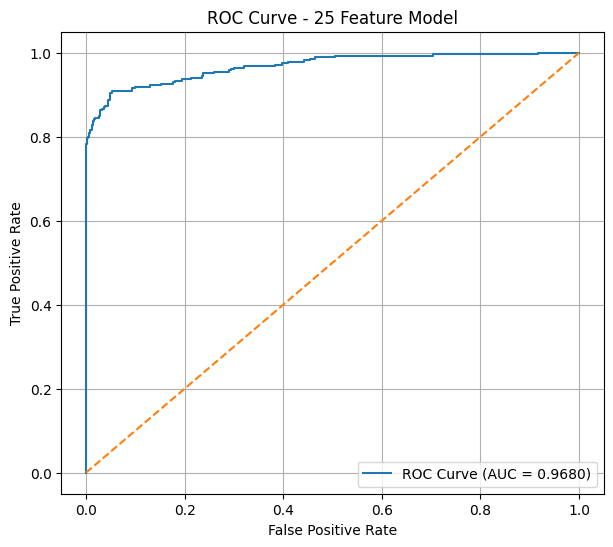

In [86]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities
y_prob = best_model.predict_proba(X_test)[:, 1]

# Compute ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot
plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--")  # random classifier line

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - 25 Feature Model")
plt.legend()
plt.grid(True)
plt.show()

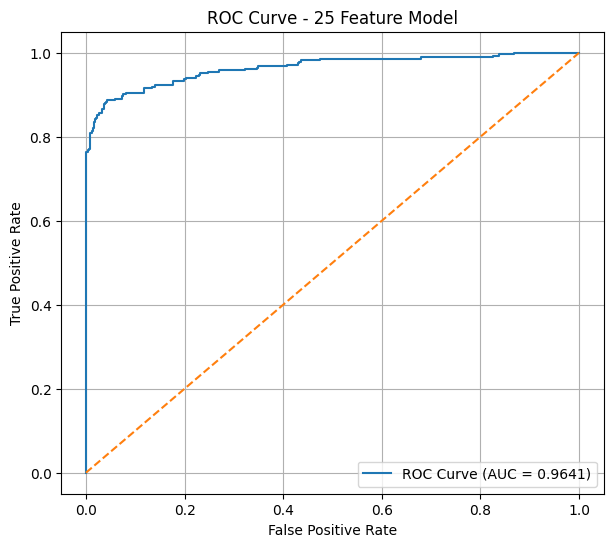

In [89]:
# Get predicted probabilities
y_prob = best_model2.predict_proba(X_test)[:, 1]

# Compute ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot
plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--")  # random classifier line

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - 25 Feature Model")
plt.legend()
plt.grid(True)
plt.show()

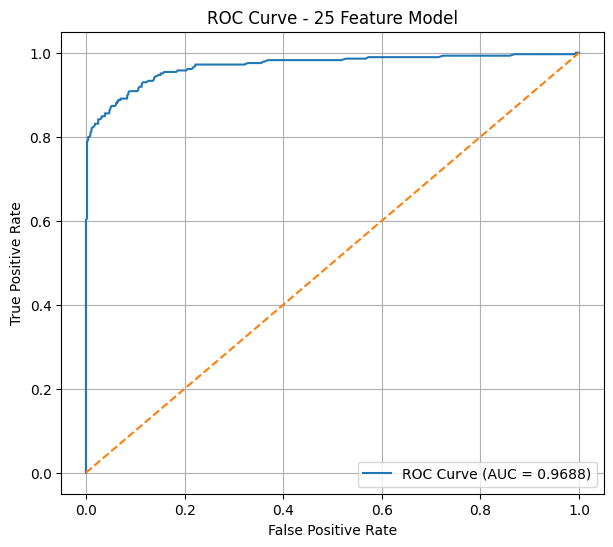

In [92]:
# Get predicted probabilities
y_prob = best_model3.predict_proba(X_test)[:, 1]

# Compute ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot
plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--")  # random classifier line

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - 25 Feature Model")
plt.legend()
plt.grid(True)
plt.show()

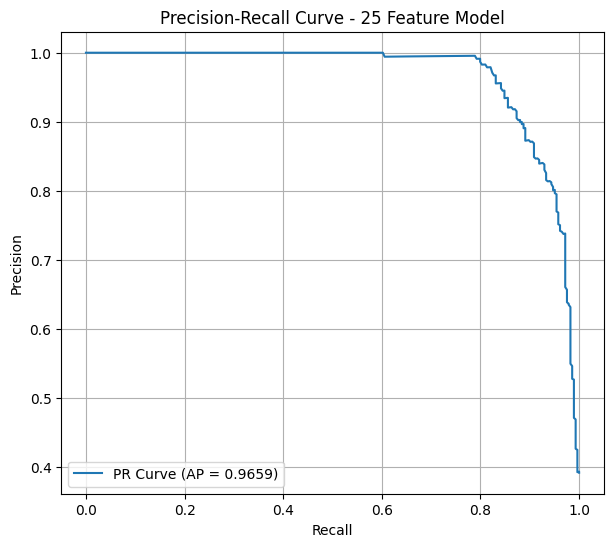

In [93]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Compute Precision-Recall
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
pr_auc = average_precision_score(y_test, y_prob)

# Plot
plt.figure(figsize=(7,6))
plt.plot(recall, precision, label=f"PR Curve (AP = {pr_auc:.4f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - 25 Feature Model")
plt.legend()
plt.grid(True)
plt.show()